In [1]:
import QuantLib as ql 
import matplotlib.pyplot as plt 

plt.style.use('bmh')

**Example**
* European Call option
* strike price \$130
* spot price \$127.62
* volatility of stock is 20%
* dividend yield is 1.63%
* short-term risk free rate is 0.1%
* today is 8th May, 2015
* expire on 15th Jan, 2016

In [2]:
# set evaluation date

eval_date = ql.Date(8, ql.May, 2015)
ql.Settings.instance().evaluationDate = eval_date

In [3]:
# option data

maturity_date = ql.Date(15, ql.January, 2016)
spot_price = 127.62
strike_price = 130
volatility = 0.2
dividend_rate = 0.0163
option_type = ql.Option.Call
risk_free_rate = 0.001
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

## European Option

In [4]:
# construct European option

payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [5]:
# Black-Scholes-Merton process

spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))

flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(eval_date,
                                                     risk_free_rate,
                                                     day_count))

dividend_yield = ql.YieldTermStructureHandle(ql.FlatForward(eval_date,
                                                            dividend_rate,
                                                            day_count))

flat_vol_ts = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(eval_date,
                                                                 calendar,
                                                                 volatility,
                                                                 day_count))

bsm_process = ql.BlackScholesMertonProcess(spot_handle,
                                           dividend_yield,
                                           flat_ts,
                                           flat_vol_ts)

In [6]:
engine = ql.AnalyticEuropeanEngine(bsm_process)
european_option.setPricingEngine(engine)
bs_price = european_option.NPV()
print(f"Theoretical price: {bs_price:.4f}")

Theoretical price: 6.7493


In [7]:
# using binomial tree

def binomial_price(option, bsm_process, steps):
    binomial_engine = ql.BinomialVanillaEngine(bsm_process, 'crr', steps)
    option.setPricingEngine(binomial_engine)
    
    return option.NPV()

In [8]:
bnm_prices = [binomial_price(european_option, bsm_process, step) for step in range(2, 200)]

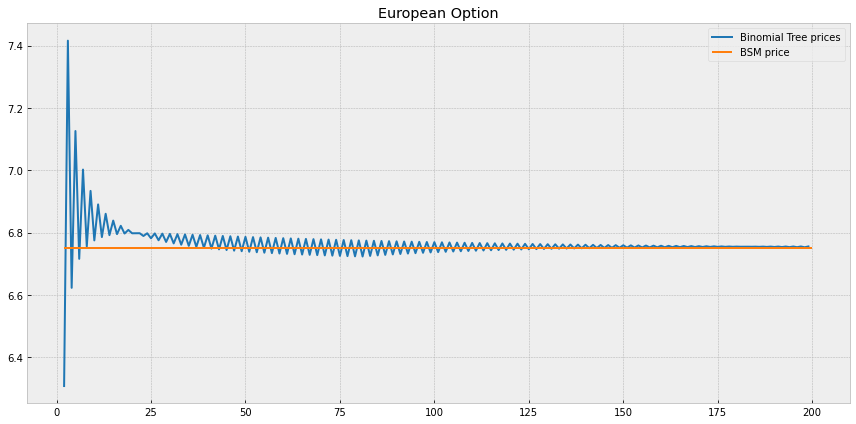

In [9]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(list(range(2,200)), bnm_prices, label='Binomial Tree prices', color='tab:blue')
ax.hlines(y=bs_price, xmin=2, xmax=200, label='BSM price', color='tab:orange')
ax.legend()
ax.set_title('European Option')

plt.tight_layout()
plt.show()

## American Option

In [10]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
settlement = eval_date
am_exercise = ql.AmericanExercise(settlement, maturity_date)
american_option = ql.VanillaOption(payoff, am_exercise)

In [11]:
am_prices = [binomial_price(american_option, bsm_process, step) for step in range(2, 200)]

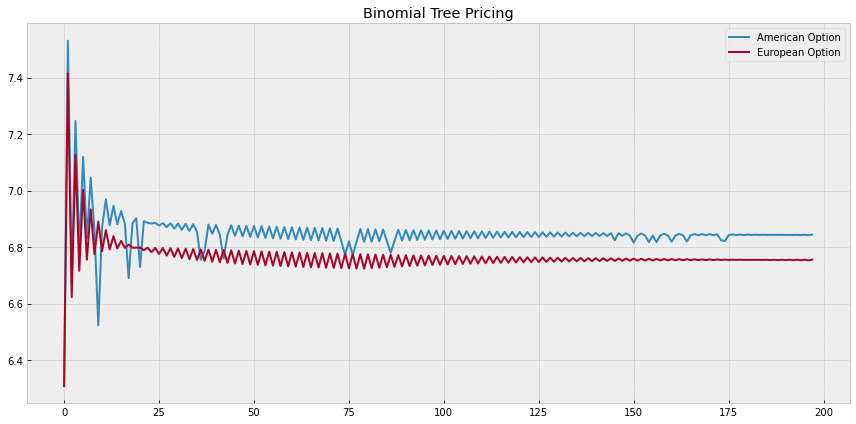

In [12]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(am_prices, label='American Option')
ax.plot(bnm_prices, label='European Option')
ax.legend()
ax.set_title('Binomial Tree Pricing')

plt.tight_layout()
plt.show()